In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

In [19]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')


In [20]:
movie_ratings = pd.merge(movies, ratings, on='movieId')


In [21]:
mean_ratings = movie_ratings.groupby(['movieId', 'title'])['rating'].mean().reset_index()


In [22]:
ratings_pivot = movie_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)


In [23]:
movie_similarity = cosine_similarity(ratings_pivot)


In [24]:
def get_recommendations(movie_title, movie_similarity, mean_ratings):
    # Get the index of the input movie
    idx = mean_ratings[mean_ratings['title'] == movie_title].index[0]
    # Get the similarity scores for all movies
    sim_scores = list(enumerate(movie_similarity[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the indices of the top 10 similar movies
    sim_indices = [i[0] for i in sim_scores[1:11]]
    # Return the titles of the top 10 similar movies
    return mean_ratings.iloc[sim_indices]['title']


TOP 10 RECOMMENDATION : 
290                         Village of the Damned (1995)
555    Bloodsport 2 (a.k.a. Bloodsport II: The Next K...
465                                    Serial Mom (1994)
474                                  Blade Runner (1982)
536                               Denise Calls Up (1995)
147                                          Kids (1995)
61                                         Friday (1995)
406    Englishman Who Went Up a Hill But Came Down a ...
204    Far From Home: The Adventures of Yellow Dog (1...
580                                       Flipper (1996)
Name: title, dtype: object


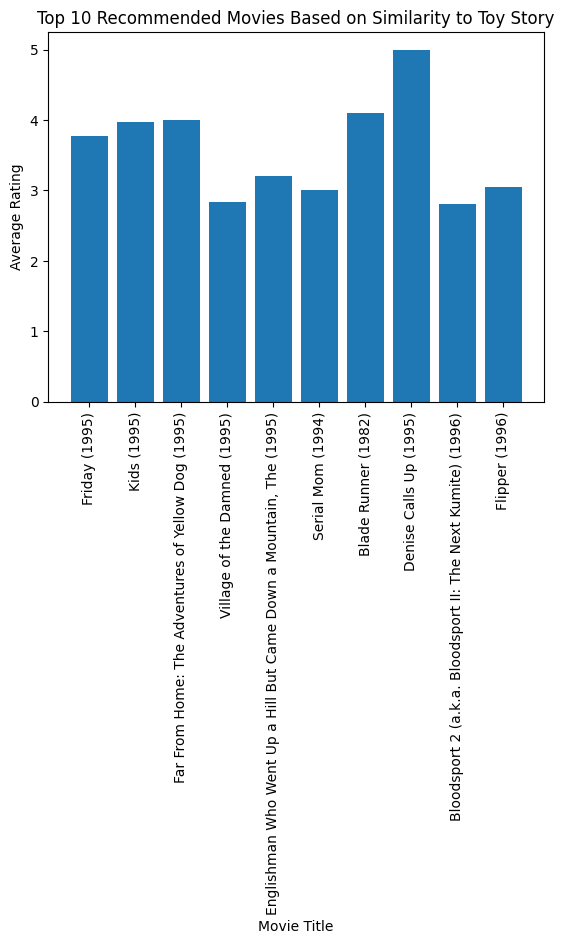

In [25]:
print("TOP 10 RECOMMENDATION : ")
recommended_movies = get_recommendations('Boys of St. Vincent, The (1992)', movie_similarity, mean_ratings)
print(recommended_movies)

import matplotlib.pyplot as plt
recommended_ratings = mean_ratings[mean_ratings['title'].isin(recommended_movies)]
recommended_ratings = recommended_ratings.set_index('title')['rating']

plt.bar(recommended_ratings.index, recommended_ratings.values)

plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top 10 Recommended Movies Based on Similarity to Toy Story')

plt.xticks(rotation=90)
plt.show()

In [29]:
movie_ratings = pd.merge(movies, ratings, on='movieId')
mean_ratings = movie_ratings.groupby(['movieId', 'title'])['rating'].mean().reset_index()
ratings_pivot = movie_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)
movie_similarity = cosine_similarity(ratings_pivot)

movie_titles = list(movies['title'])

movie_dropdown = widgets.Dropdown(options=movie_titles, description='Select a movie:')


def get_recommendations(movie_title, movie_similarity, mean_ratings):
    idx = mean_ratings[mean_ratings['title'] == movie_title].index[0]
    sim_scores = list(enumerate(movie_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:11]]
    return mean_ratings.iloc[sim_indices][['title', 'rating', 'movieId']]

def show_recommendations(movie_title):
    recommended_movies = get_recommendations(movie_title, movie_similarity, mean_ratings)
    recommended_ratings = mean_ratings[mean_ratings['title'].isin(recommended_movies['title'])]
    recommended_ratings = recommended_ratings.set_index('title')['rating'].sort_values(ascending=False)[:10]
    ax = recommended_ratings.plot(kind='bar', rot=90)
    ax.set_xlabel('Movie Title')
    ax.set_ylabel('Average Rating')
    ax.set_title(f'Top 10 Recommended Movies Based on Similarity to {movie_title}')
    plt.show()

widgets.interactive(show_recommendations, movie_title=movie_dropdown)

interactive(children=(Dropdown(description='Select a movie:', options=('Toy Story (1995)', 'Jumanji (1995)', '…